In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBClassifier # Added import for XGBClassifier
from sklearn.metrics import accuracy_score # Added import for accuracy_score

In [2]:
url='/content/train.csv'
df=pd.read_csv(url)
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


In [3]:
df.sample(10)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
5183,5183,2286.0,NaN,20454.0,F,NaN,NaN,NaN,N,0.8,NaN,3.24,NaN,NaN,NaN,NaN,180.0,11.2,4.0,D
10288,10288,1433.0,Placebo,14060.0,F,N,N,N,N,0.5,280.0,3.74,39.0,1162.0,106.95,224.0,427.0,9.8,1.0,C
4285,4285,853.0,D-penicillamine,21600.0,F,N,Y,Y,N,3.5,168.0,3.90,225.0,1052.0,120.90,75.0,108.0,11.0,4.0,D
13958,13958,785.0,NaN,19358.0,F,NaN,NaN,NaN,N,4.6,NaN,3.30,NaN,NaN,NaN,NaN,265.0,11.8,4.0,D
5335,5335,4256.0,Placebo,16279.0,F,N,Y,N,N,0.6,204.0,3.65,28.0,559.0,71.30,58.0,309.0,9.7,4.0,C
13833,13833,359.0,NaN,19358.0,F,NaN,NaN,NaN,N,1.7,NaN,3.12,NaN,NaN,NaN,NaN,142.0,11.0,4.0,D
2850,2850,3707.0,Placebo,16990.0,F,N,Y,N,N,0.6,232.0,3.56,74.0,791.0,108.50,109.0,221.0,10.8,4.0,C
3784,3784,976.0,NaN,19358.0,F,NaN,NaN,NaN,N,1.8,NaN,3.19,NaN,NaN,NaN,NaN,102.0,10.4,4.0,CL
14730,14730,1129.0,NaN,19724.0,F,NaN,NaN,NaN,N,2.2,NaN,3.63,NaN,NaN,NaN,NaN,190.0,13.6,4.0,D
1405,1405,904.0,Placebo,22336.0,F,N,Y,Y,N,1.3,248.0,3.20,63.0,5833.0,74.40,106.0,226.0,10.2,4.0,D


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8494 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8502 non-null   object 
 6   Hepatomegaly   8492 non-null   object 
 7   Spiders        8491 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6701 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8399 non-null   float64
 13  Alk_Phos       8488 non-null   float64
 14  SGOT           8486 non-null   float64
 15  Tryglicerides  6666 non-null   float64
 16  Platelets      14436 non-null  float64
 17  Prothrombin    14984 non-null  float64
 18  Stage 

In [5]:
df.isnull().sum()

,0
id,0
N_Days,0
Drug,6506
Age,0
Sex,0
Ascites,6498
Hepatomegaly,6508
Spiders,6509
Edema,0
Bilirubin,0


In [6]:
df=df.drop(columns=['Tryglicerides'])

In [7]:
df=df.drop(columns=['Cholesterol'])

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
id,0
N_Days,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [10]:
encoder = LabelEncoder()
df['Drug'] = encoder.fit_transform(df['Drug'].values)
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['Age'] = encoder.fit_transform(df['Age'].values)
df['Ascites']=encoder.fit_transform(df['Ascites'].values)
df['Hepatomegaly']=encoder.fit_transform(df['Hepatomegaly'].values)
df['Spiders']=encoder.fit_transform(df['Spiders'].values)
df['Edema']=encoder.fit_transform(df['Edema'].values)
df['Status']=encoder.fit_transform(df['Status'].values)
df.head()
df.sample(10)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Stage,Status
11314,11314,2357.0,0,367,0,0,1,0,1,5.0,3.50,63.0,1636.0,150.35,79.0,11.4,4.0,2
13284,13284,2456.0,0,99,0,0,0,0,0,0.6,3.93,20.0,2276.0,128.65,356.0,9.6,3.0,2
11980,11980,1149.0,1,293,0,0,0,0,0,1.0,3.35,44.0,1260.0,99.00,284.0,10.5,3.0,0
5556,5556,2256.0,0,170,0,0,0,0,0,0.6,4.22,30.0,646.0,57.35,192.0,10.6,3.0,0
4476,4476,3913.0,0,7,0,0,0,0,0,0.7,3.01,82.0,1860.0,218.55,344.0,11.0,3.0,0
11919,11919,1542.0,1,237,0,0,1,1,0,2.3,3.68,77.0,1877.0,97.65,123.0,11.2,4.0,2
14116,14116,2863.0,1,180,0,0,0,0,0,0.5,4.40,68.0,453.0,54.25,270.0,11.1,3.0,0
2619,2619,1250.0,0,339,0,0,1,0,0,6.4,3.70,96.0,1790.0,151.90,145.0,11.5,4.0,2
2949,2949,2224.0,0,266,0,0,1,0,0,0.8,4.14,30.0,645.0,57.35,128.0,9.5,3.0,0
2724,2724,4459.0,1,23,0,0,0,0,0,0.7,3.85,48.0,1637.0,141.05,427.0,10.6,3.0,0


In [11]:
y = df['Status'].values

In [12]:
X=df.drop(['Status'], axis=1).values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [14]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_predict = tree_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2180
           1       0.14      0.13      0.14        98
           2       0.67      0.67      0.67       987

    accuracy                           0.77      3265
   macro avg       0.55      0.55      0.55      3265
weighted avg       0.77      0.77      0.77      3265



In [17]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.7702909647779479


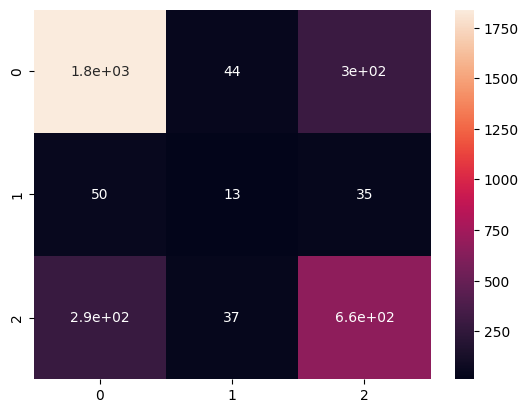

In [18]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [19]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      5472
           1       0.12      0.17      0.14       218
           2       0.66      0.66      0.66      2471
           3       0.00      0.00      0.00         1

    accuracy                           0.76      8162
   macro avg       0.41      0.42      0.41      8162
weighted avg       0.77      0.76      0.77      8162



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


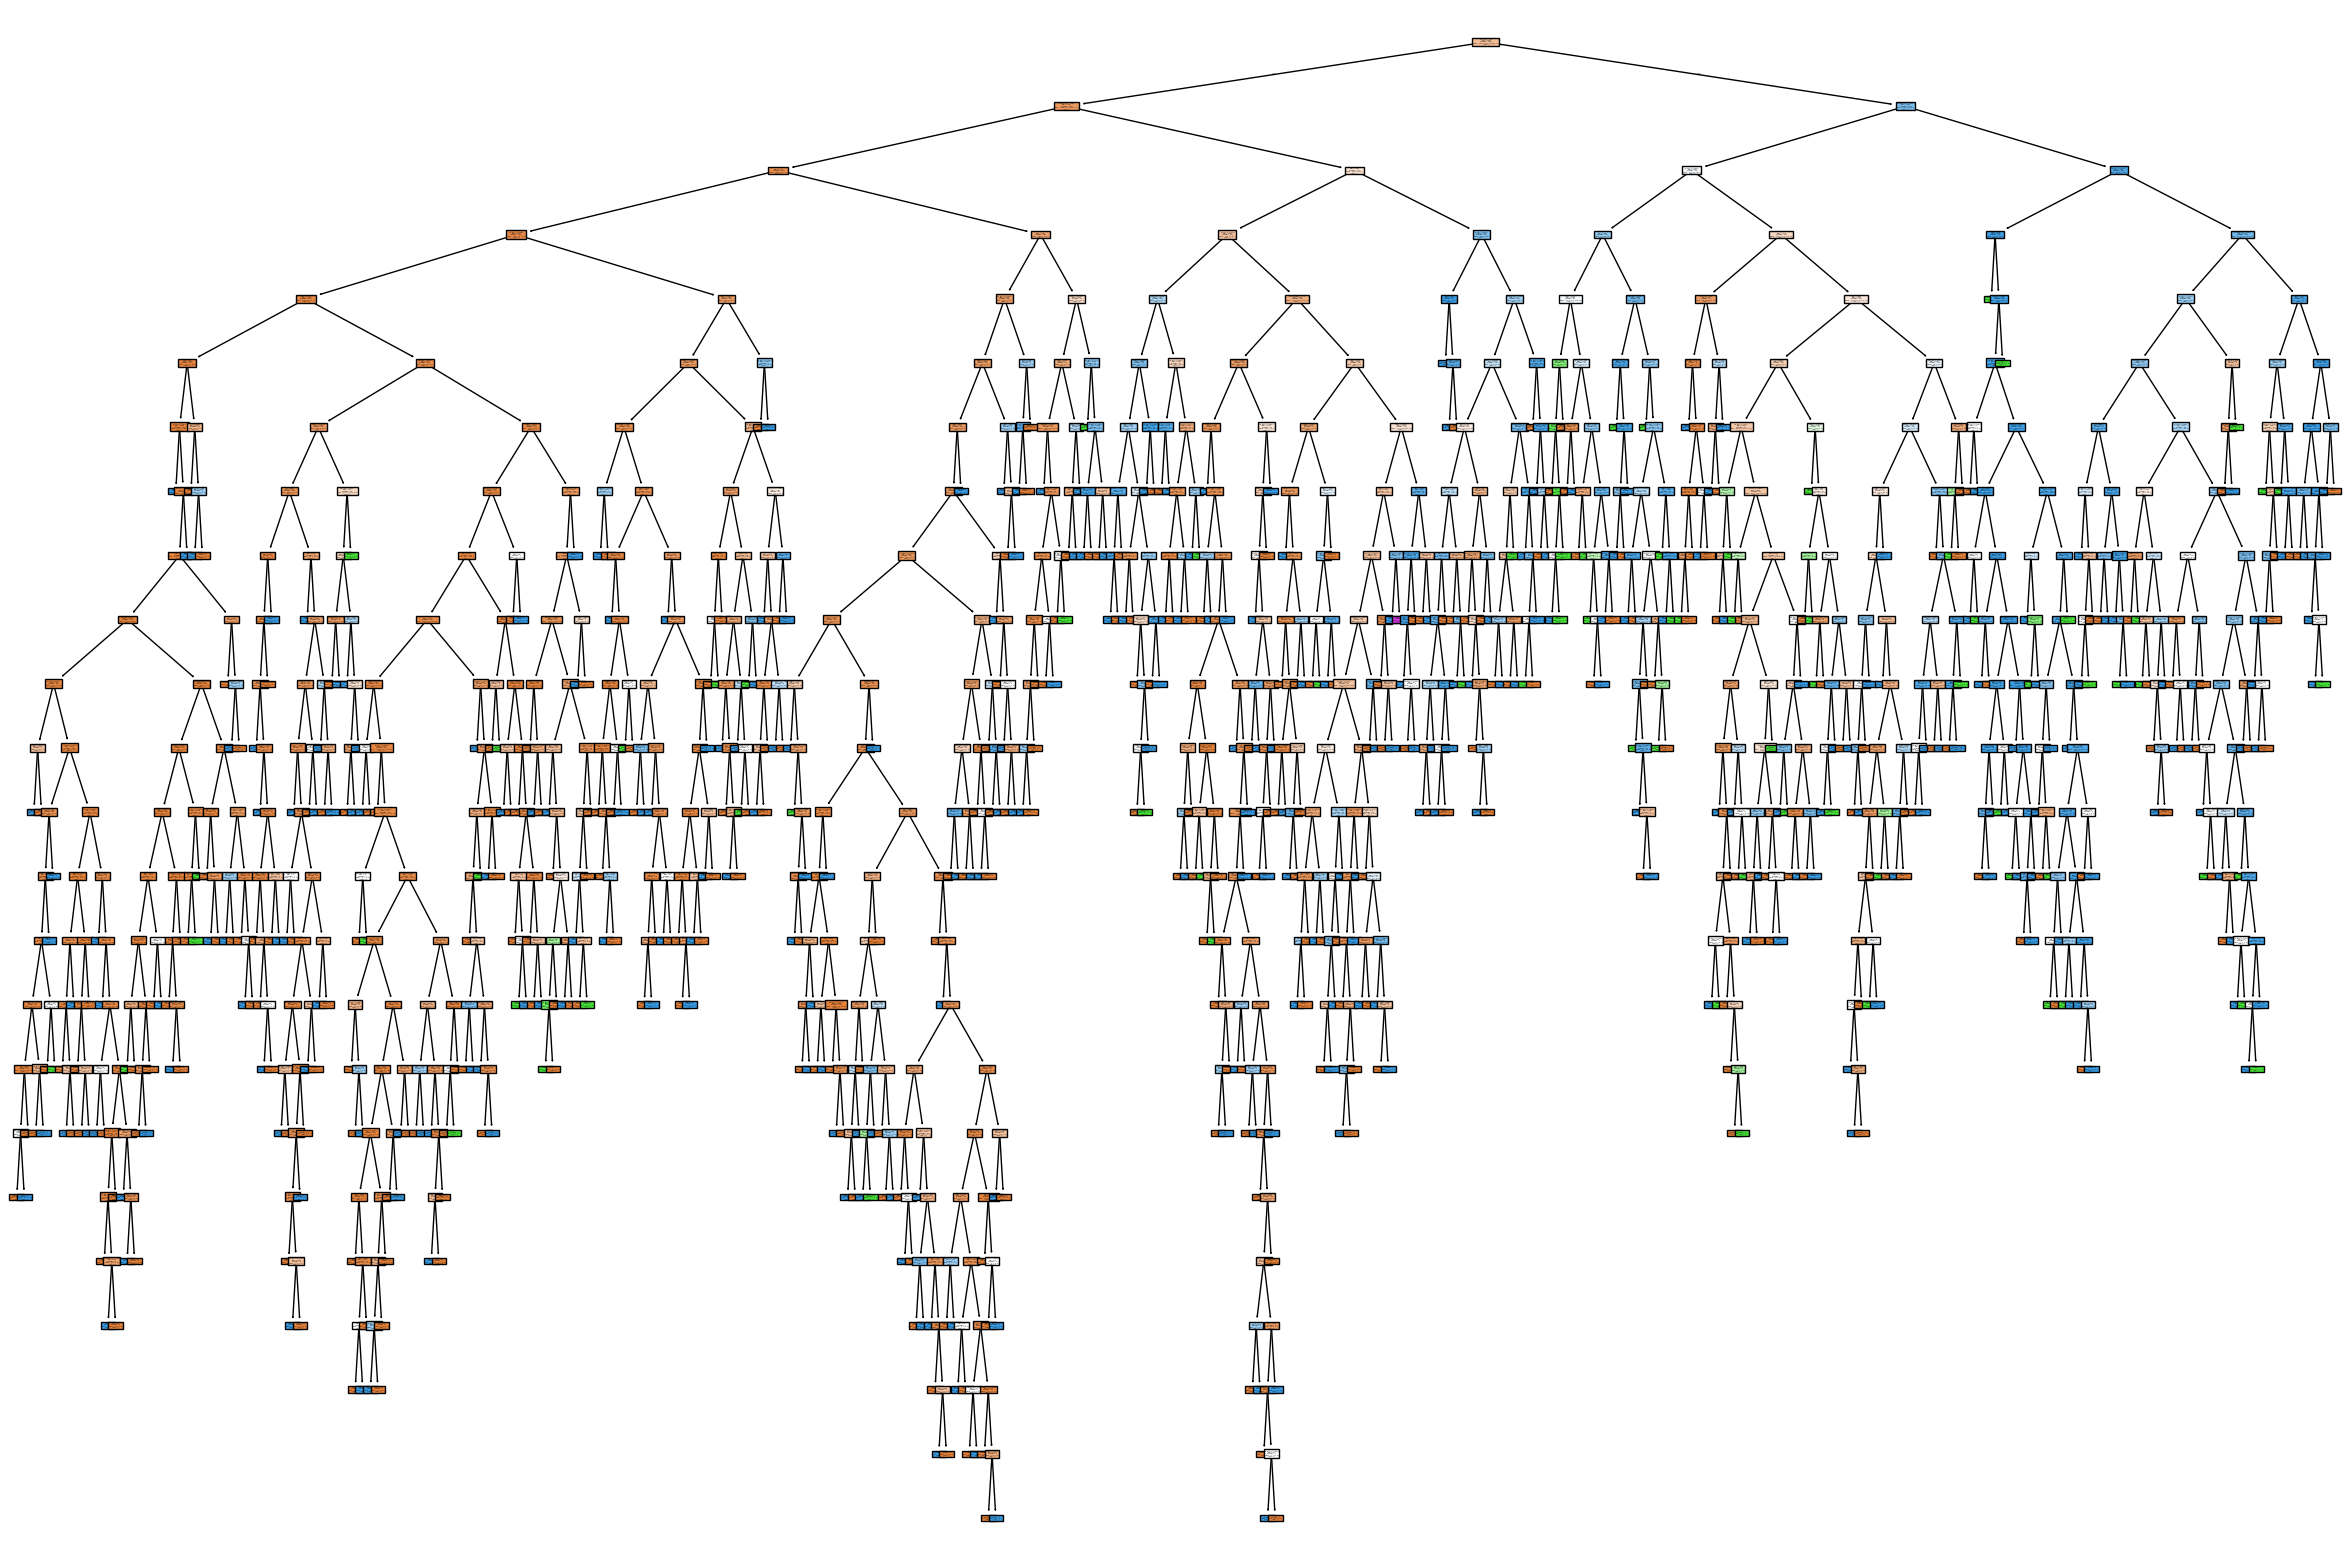

In [20]:
cols = df.drop(['Status'], axis=1).columns
classes = [str(x) for x in df['Status'].unique()]

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.8021439509954058


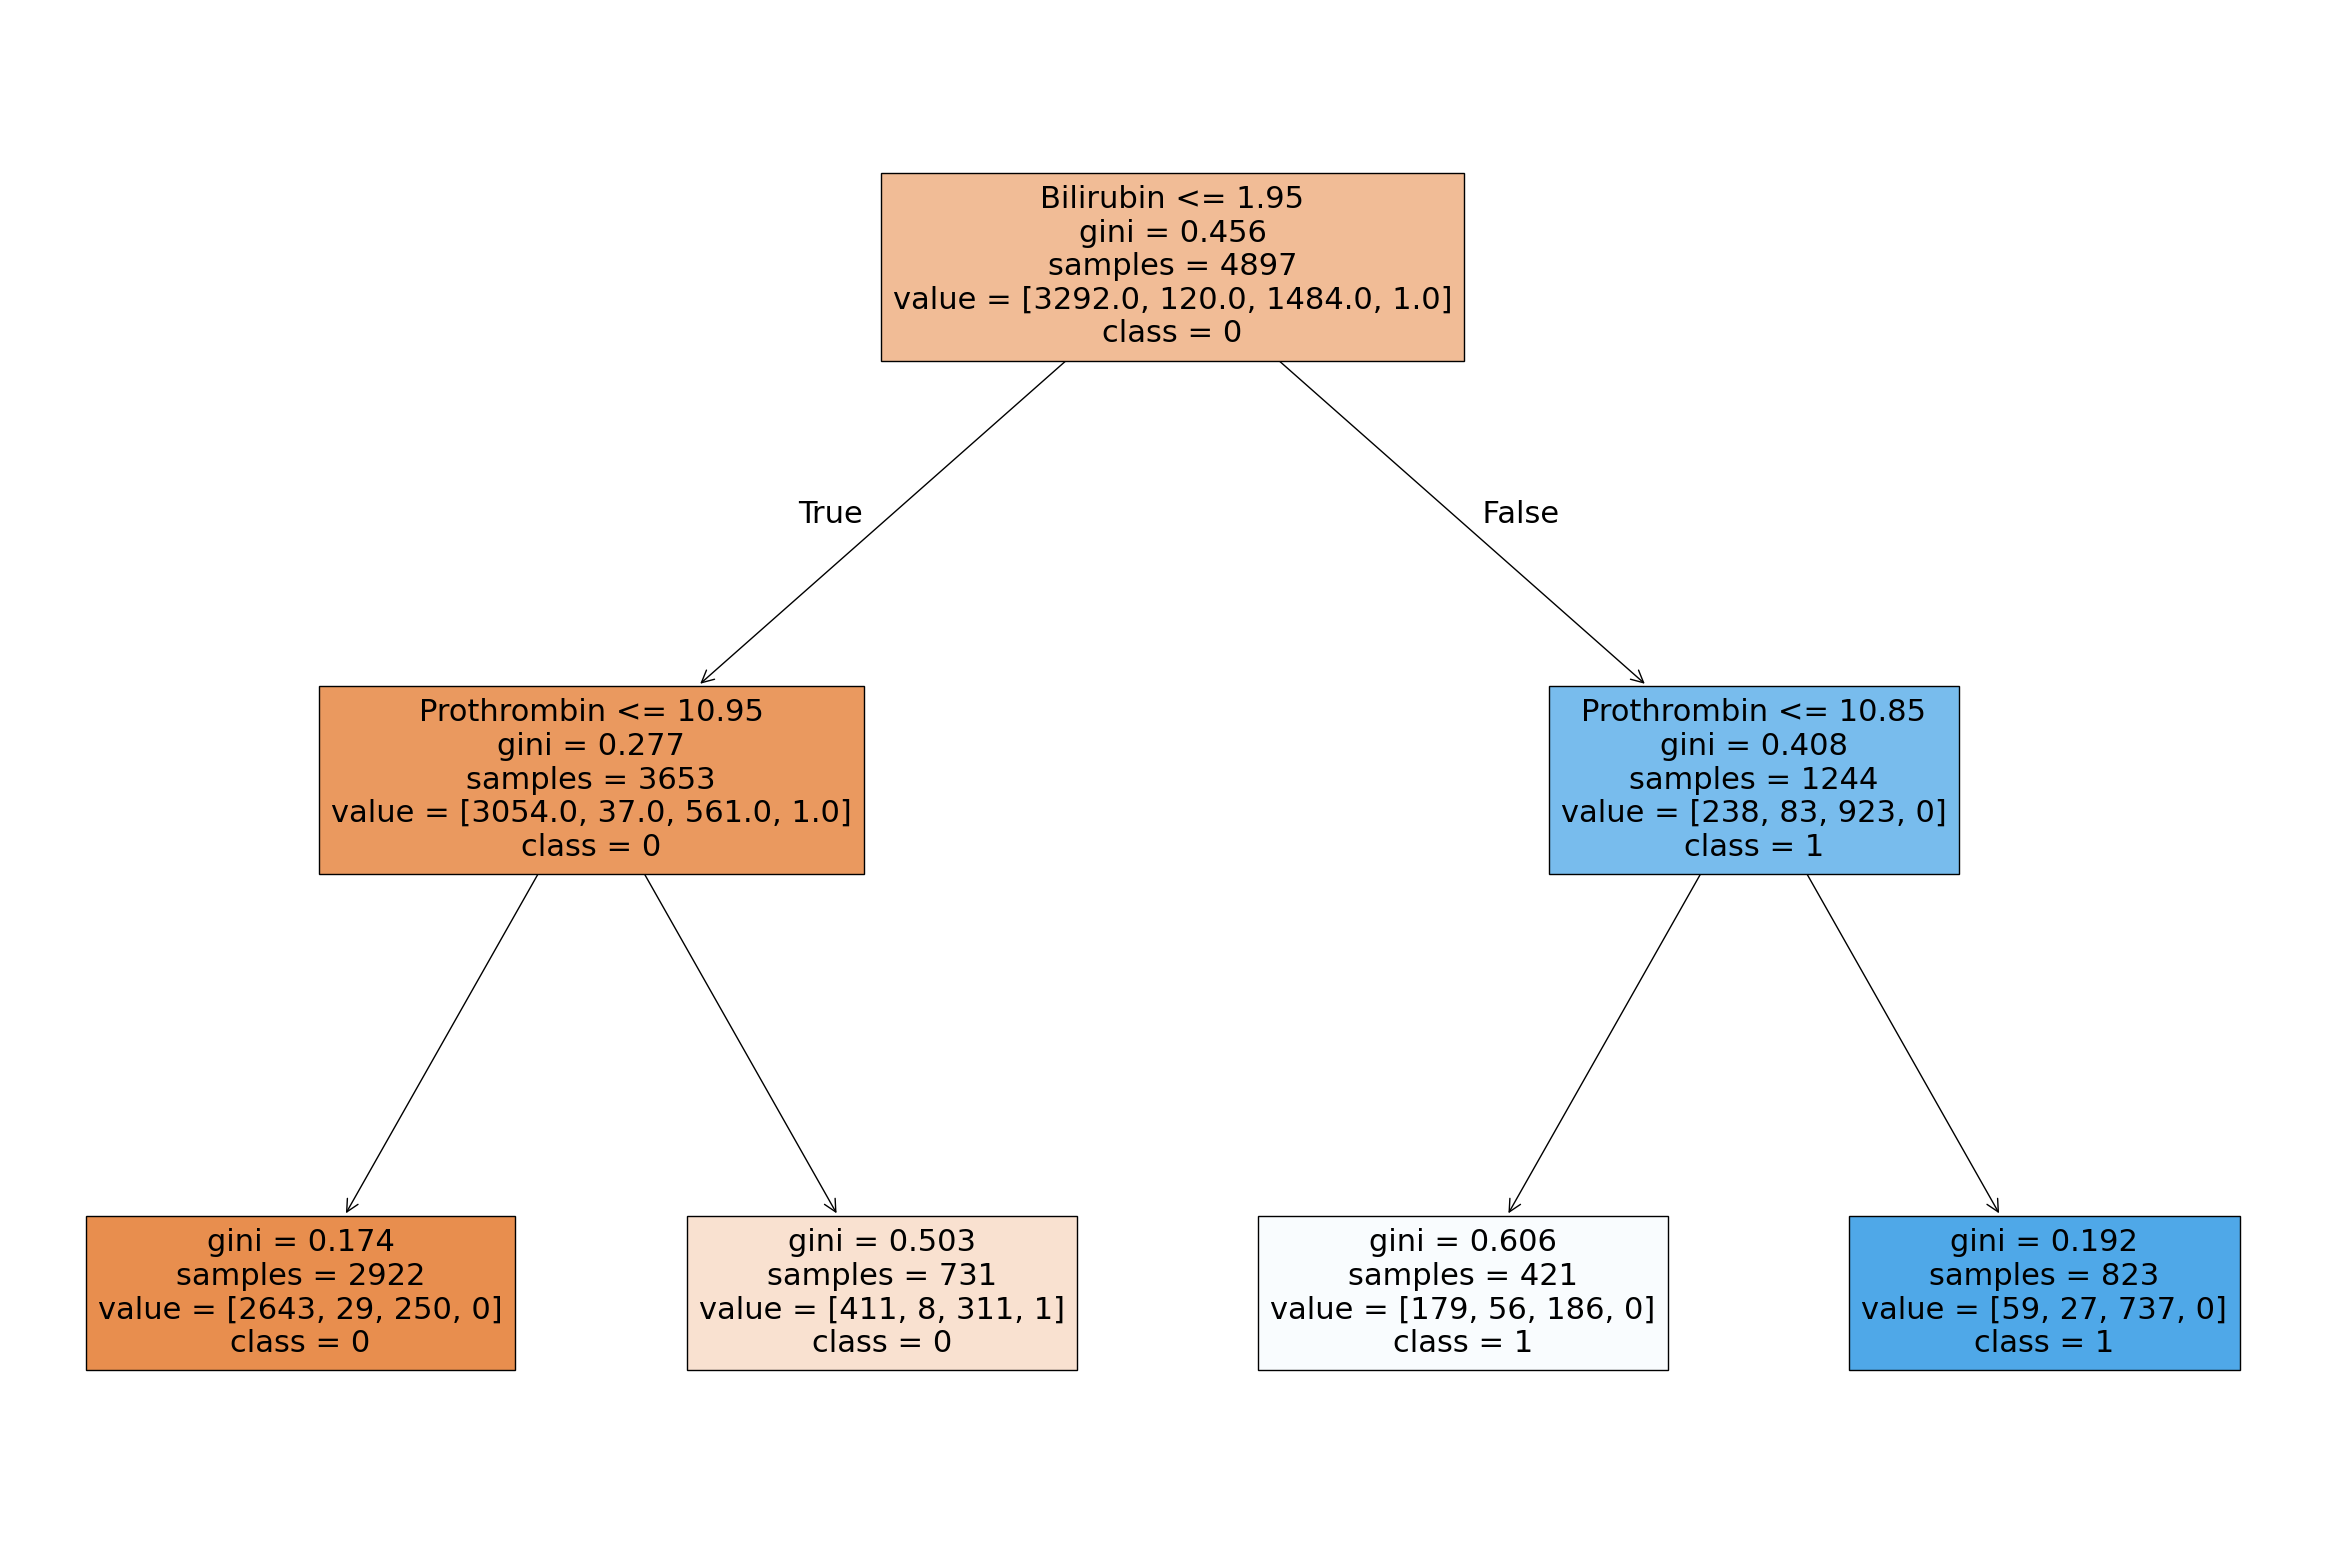

In [21]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.8290964777947932


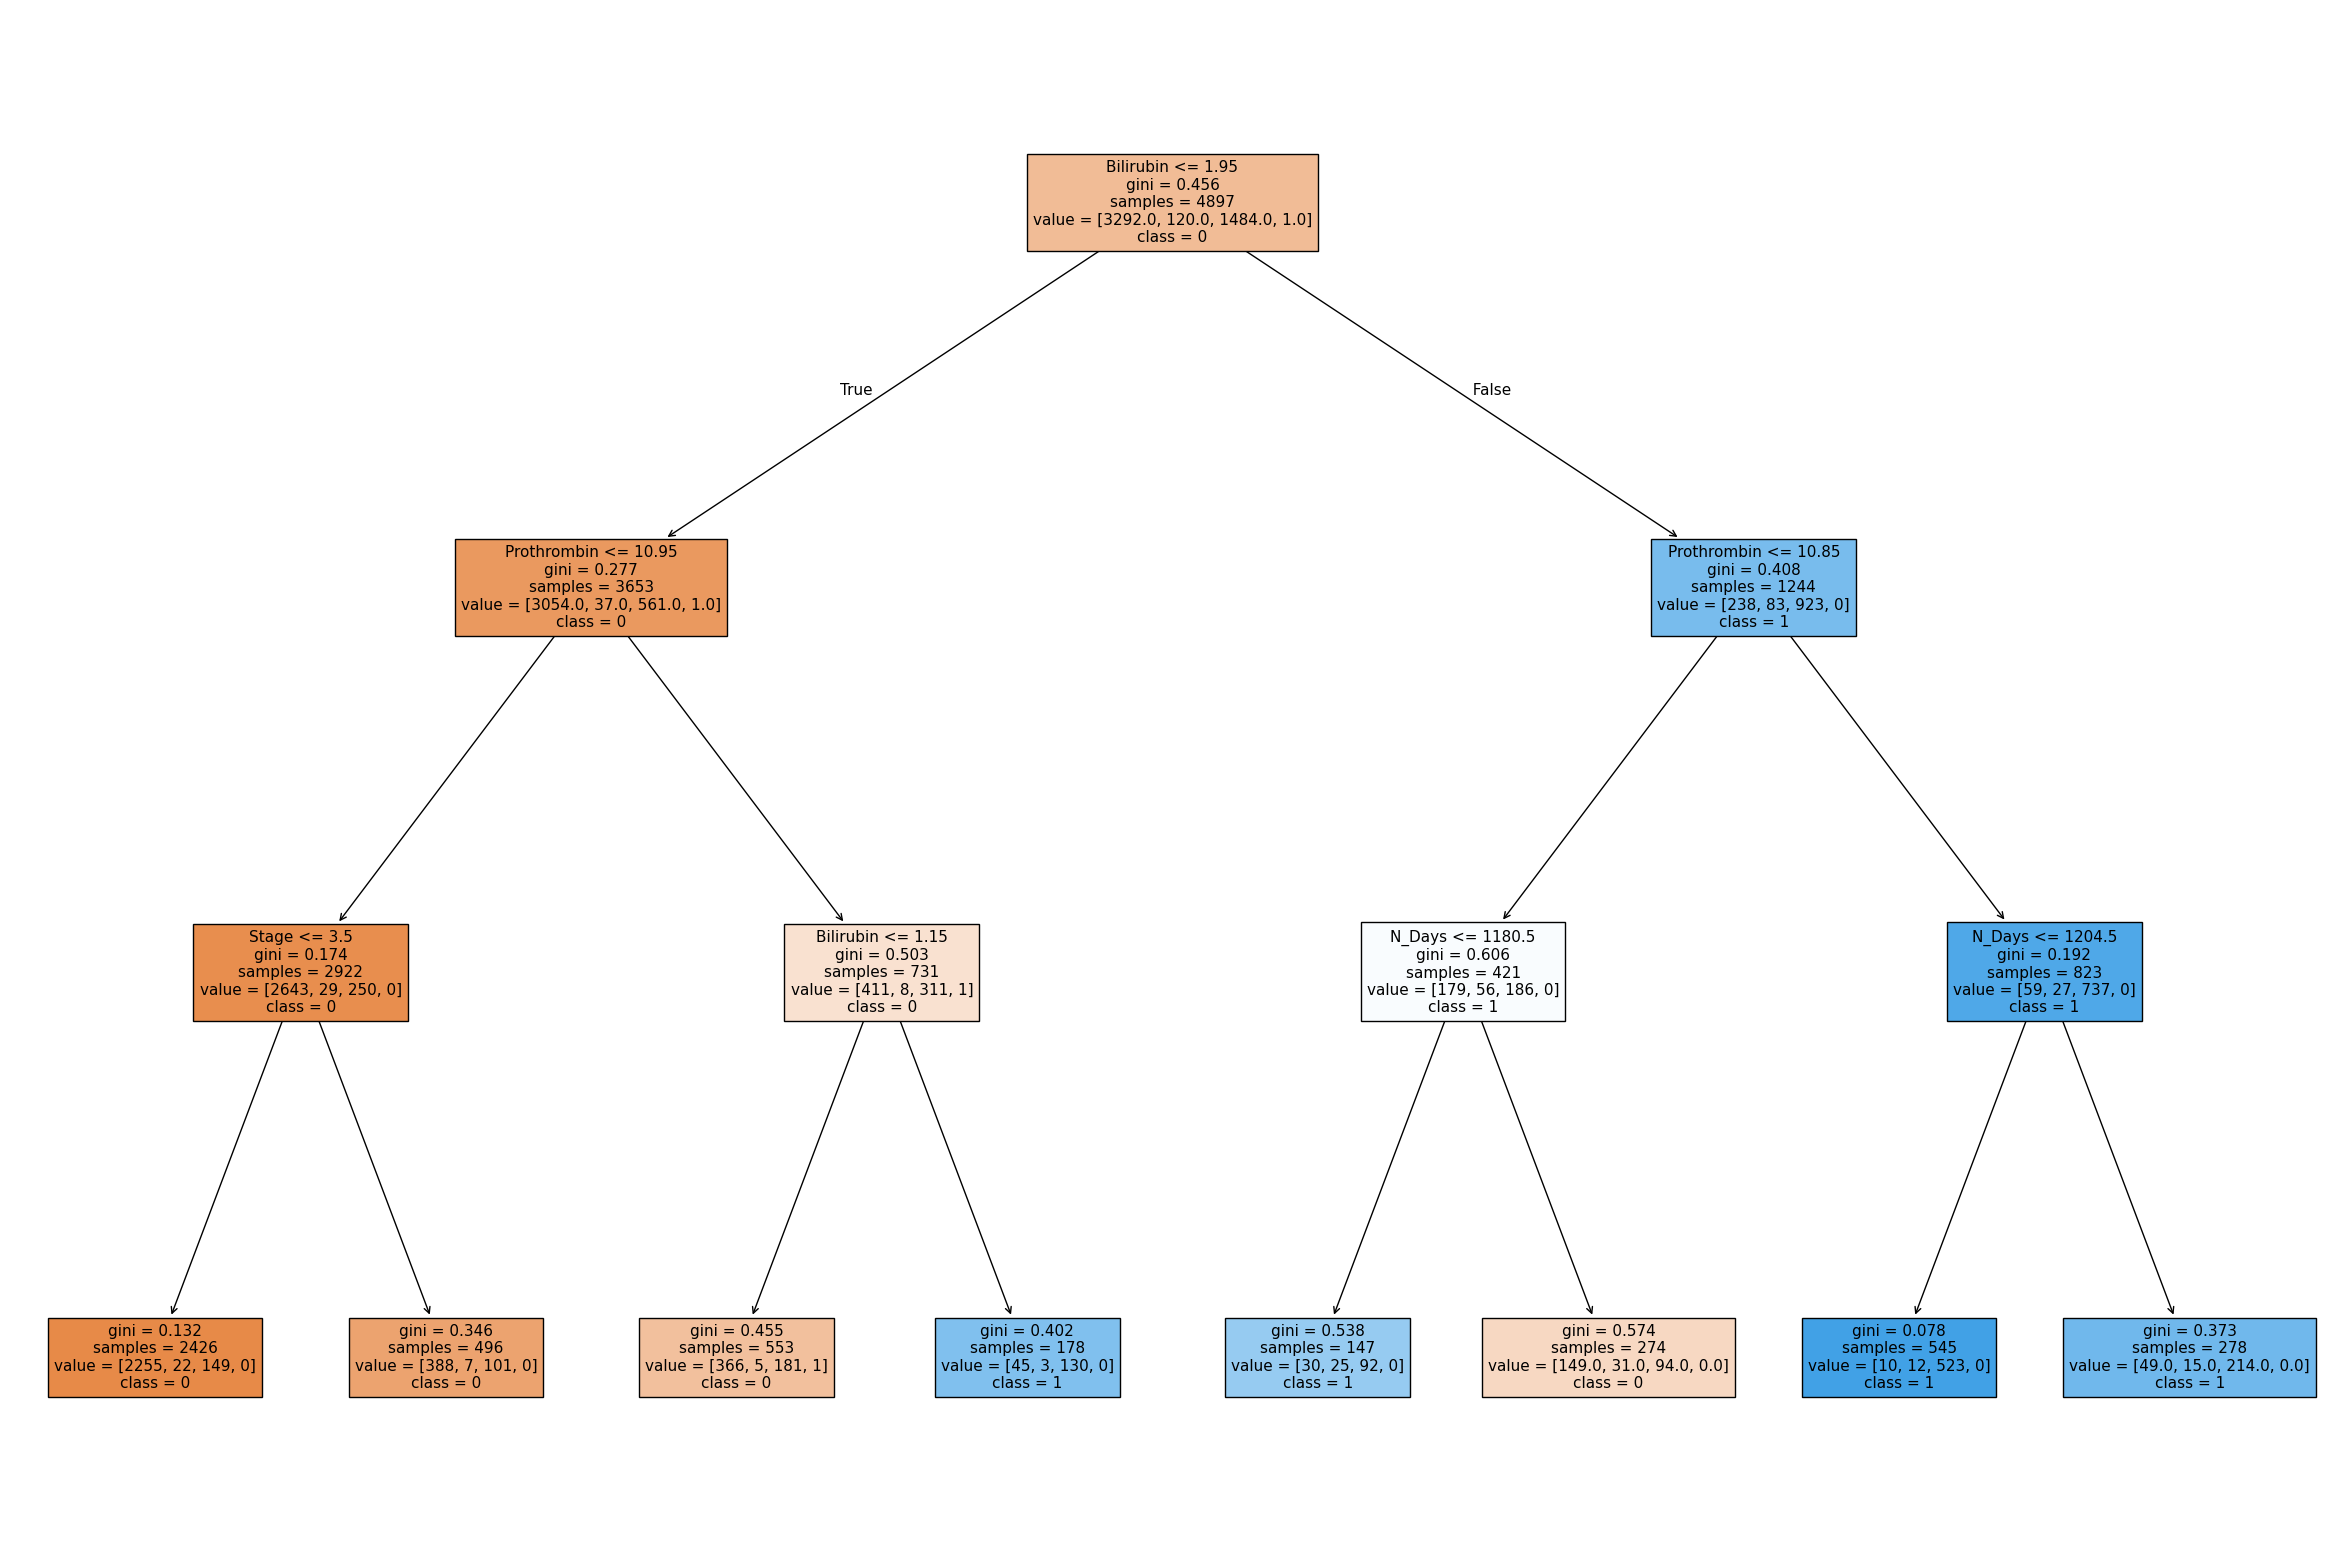

In [22]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [23]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2180
           1       0.43      0.03      0.06        98
           2       0.81      0.74      0.77       987

    accuracy                           0.85      3265
   macro avg       0.70      0.57      0.58      3265
weighted avg       0.84      0.85      0.84      3265



In [24]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.8290964777947932


In [26]:
import pickle

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Save the XGBoost model to a file
filename = 'xgb_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

print(f"XGBoost model saved to {filename}")

XGBoost model saved to xgb_model.pkl
